In [30]:
import pandas as pd # <--  used for reading in excell files.  creates a dataframe.  Think of a dataframe losely as an excell spreadsheet.  We rename pandas to pd for convenience
import pylab # <-- used for plots .  simple but quick to use.  interactive ones can be made with plotly and bokeh.  later
import numpy as np  # <-- used for maths and arrays.

In [2]:
df = pd.read_excel('data/shares_basic.xlsx')

In [3]:
df.head() # just display the first few rows for a sanity check

,ticker,company name,current price,%daily,base price,AU adjusted value,Quantity,% of total,market,type,...,Sn,other,check,$U,$Au,$Ag,$Cu,$Ni,$Sn,$other
0,MRM,NaN,0.440,0.035294,0.315000,2860.000000,6500,0.018848,asx,equity,...,NaN,1.0,OK,0.0,0.000000,0.0,0.0,0.0,0.0,2860.0
1,AGE,NaN,0.037,0.000000,0.026545,4070.000000,110000,0.026822,ASX,EQUITY,...,NaN,NaN,OK,4070.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,PDN,NaN,0.490,-0.020000,0.355299,6566.000000,13400,0.043271,ASX,EQUITY,...,NaN,NaN,OK,6566.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,FNV,NaN,145.230,-0.000275,108.368000,4786.119167,25,0.031541,US,ROYALTY,...,NaN,NaN,OK,0.0,4786.119167,0.0,0.0,0.0,0.0,0.0
4,GXY,NaN,3.640,0.045977,2.730000,1820.000000,500,0.011994,ASX,EQUITY,...,NaN,1.0,OK,0.0,0.000000,0.0,0.0,0.0,0.0,1820.0


## Lets do Some very simple visualisation of the data we have. 

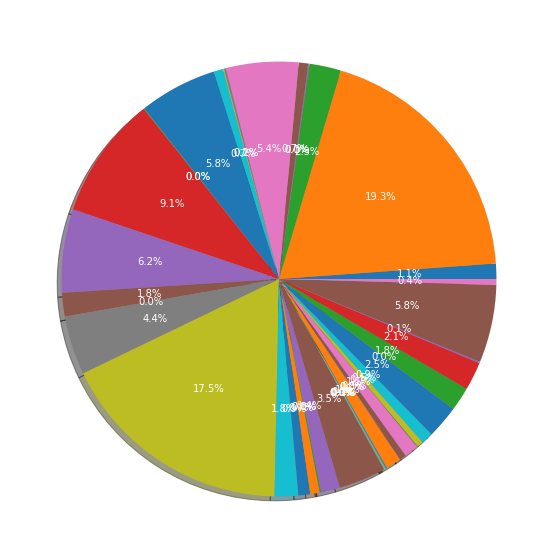

In [59]:
pylab.pie(df['Quantity'], labels=df['ticker'], shadow = True, autopct='%1.1f%%', textprops={'color':"w"});

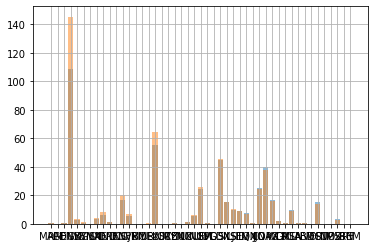

In [13]:
pylab.bar(df['ticker'], df['base price'], alpha = 0.5)
pylab.bar(df['ticker'], df['current price'], alpha = 0.5)
pylab.grid(True)

In [19]:
pylab.rcParams["figure.figsize"] = (20,10) #<-- play with these until you get the desired aspect ratio

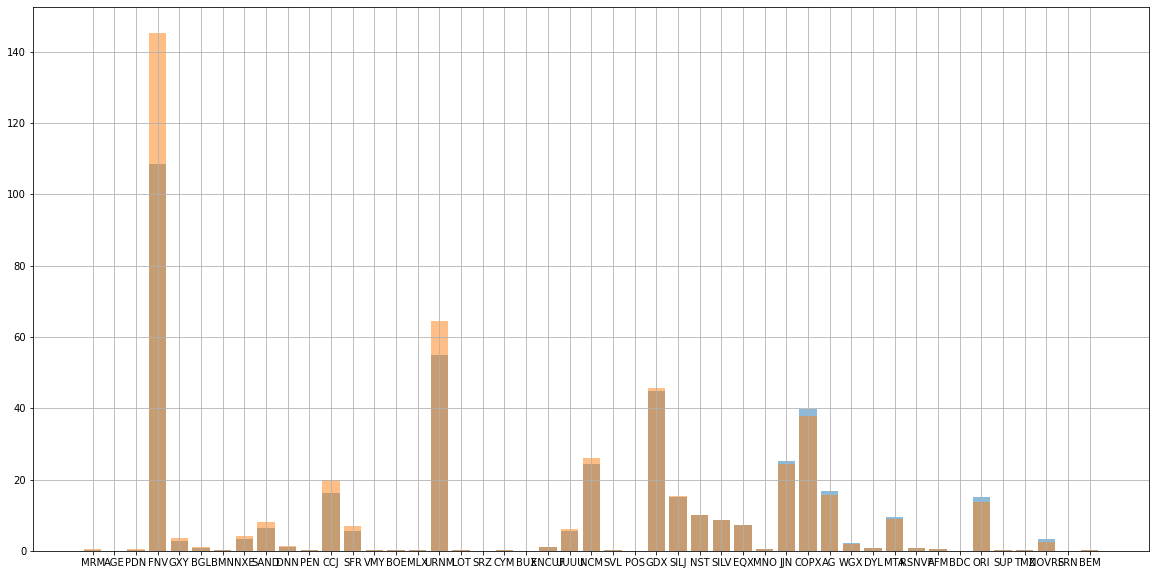

In [20]:
pylab.bar(df['ticker'], df['base price'], alpha = 0.5)
pylab.bar(df['ticker'], df['current price'], alpha = 0.5)
pylab.grid(True)

## Now lets look at the percent difference

In [37]:
pct_diff = (df['base price'] - df['current price']) / df['base price'] * 100
pct_diff = pct_diff.to_numpy();  # we convert from a dataframe to numpy array for convenience  the ';' suppresses the output.  try remove and run the cell again.

Text(0.05, 20, 'Average return -6.6020823153296995')

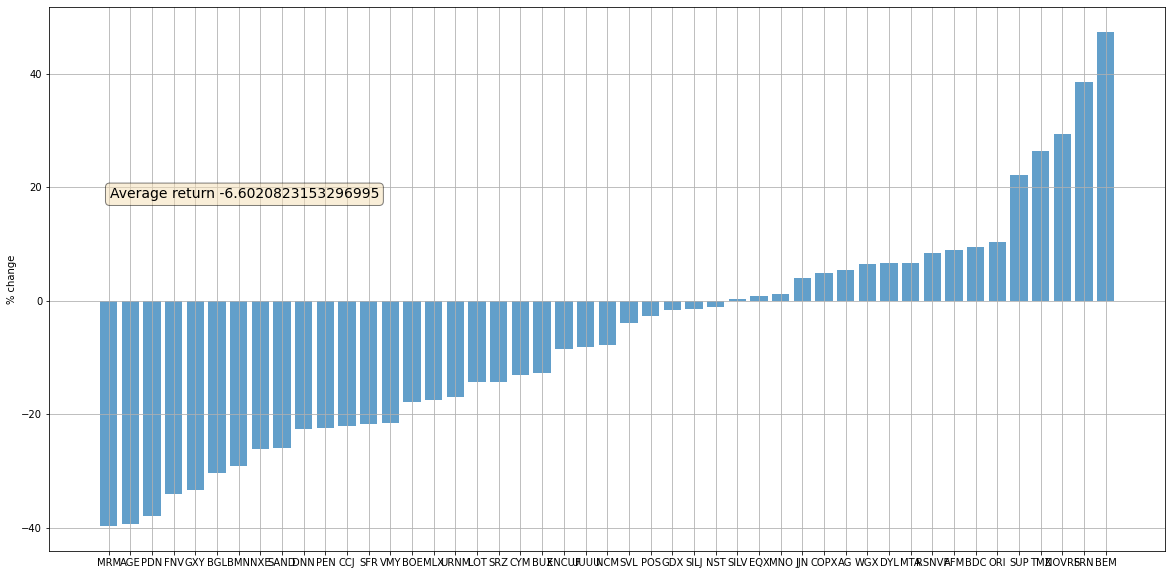

In [51]:
pct_total_av = pct_diff.mean()

pylab.bar(df['ticker'], pct_diff, alpha = 0.7)
pylab.ylabel('% change')
pylab.grid(True)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
text = f'Average return {pct_total_av}'  # we can combine string and variables.  put string in {}  or use str(pct_total_av) to convert
pylab.text(0.05, 20, text ,  fontsize=14,
        verticalalignment='top', bbox=props)

In [91]:
a_type = df.groupby('type')['Quantity'].mean()  # can do a lot with this groupby

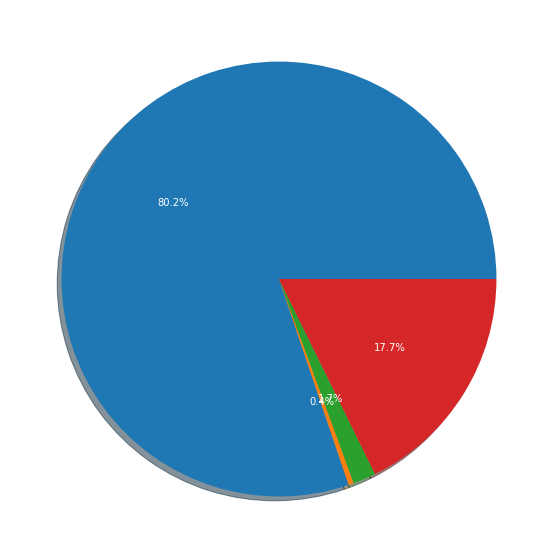

In [94]:
pylab.pie(a_type, labels = a_type.index, shadow = True, autopct='%1.1f%%', textprops={'color':"w"});

In [85]:
a = df.groupby('type')['Quantity'].mean()

In [90]:
a.index



Index(['EQUITY', 'ETF', 'ROYALTY', 'equity'], dtype='object', name='type')